In [1]:
import numpy as np
import pandas as pd
import os
cwd = os.getcwd()
print(cwd)

C:\Users\Marci


In [34]:
data = pd.read_csv("Desktop/Iris.csv")
iris = data

In [3]:
iris = pd.read_csv("Desktop/Iris.csv")

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

iris = pd.read_csv("Desktop/Iris.csv")
print(iris.shape)
print("Each type of iris flower has 50 observations)
print(iris.Species.value_counts())
print("Label encoding of Species column")
le = LabelEncoder()
le.fit(iris['Species'])
print(list(le.classes_))
iris['Species'] = le.transform(iris['Species'])
# So after encoding 0 refers to Iris-setosa, 1 refers to Iris-versicolor, 2 refers to Iris-virginica
print(iris['Species'][0:5])
print(iris['Species'][50:55])
print(iris['Species'][100:105])
# Converting into numpy matrix
iris_matrix = pd.DataFrame.as_matrix(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
# Building KMeans Clustering model with 3 clusters since we know the iris dataset has three classes of iris flower
# And so ideally thinking they should be in 3 different clusters (but this maynot be the case)
cluster_model = KMeans(n_clusters=3, random_state=10)
cluster_labels = cluster_model.fit_predict(iris_matrix)
adj_rand_score = adjusted_rand_score(iris['Species'],cluster_labels)
print ("For n_clusters = 3 ", 
          "The adjusted rand_score is:", adj_rand_score)
# In case we don't know prior the true labels in the dataset, and can't decide on number of clusters which should be given to KMeans.
# We can then build many KMeans clustering model and check the Silhouette Score of each of the clustering model.
# A higher Silhouette Coefficeint score relates to a model with better defined clusters.
# For more information on Silhouette Score look at http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient
# Below we build 10 KMeans clustering model & check the Silhouette Score & Adjusted Rand score of each of the model. 
for n_clusters in range(2,11):
    cluster_model = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = cluster_model.fit_predict(iris_matrix)
    silhouette_avg = silhouette_score(iris_matrix,cluster_labels,metric='euclidean')
    adj_rand_score = adjusted_rand_score(iris['Species'],cluster_labels)
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is:", silhouette_avg)
    print ("For n_clusters =", n_clusters, 
          "The adjusted rand_score is:", adj_rand_score)
# From above results it can be seen that Silhouette Score is highest for 2 clusters 
# and Adjusted Rand Score is greatest for 3 clusters.
# Silhouette Score is highest for 2 clusters because Silhouette score is more for better defined & separated clusters.
# And as can be seen in below plot there are 2 distinct & better separated clusters.
# Adjusted Rand Score measures the similarity between true labels & predicted labels(obtained by clustering).
# Plot Copied from https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations/notebook
from pandas.tools.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")
# Now let us apply Hierarchical Clustering which is implemented in scikit-learn as AgglomerativeClustering
for n_clusters in range(2,11):
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',linkage='ward')
    cluster_labels = cluster_model.fit_predict(iris_matrix)
    silhouette_avg = silhouette_score(iris_matrix,cluster_labels,metric='euclidean')
    adj_rand_score = adjusted_rand_score(iris['Species'],cluster_labels)
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is:", silhouette_avg)
    print ("For n_clusters =", n_clusters, 
          "The adjusted rand_score is:", adj_rand_score)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64
50    1
51    1
52    1
53    1
54    1
Name: Species, dtype: int64
100    2
101    2
102    2
103    2
104    2
Name: Species, dtype: int64
For n_clusters = 3  The adjusted rand_score is: 0.7302382722834697
For n_clusters = 2 The average silhouette_score is: 0.680813620294
For n_clusters = 2 The adjusted rand_score is: 0.5399218294207123
For n_clusters = 3 The average silhouette_score is: 0.55259194455
For n_clusters = 3 The adjusted rand_score is: 0.7302382722834697
For n_clusters = 4 The average silhouette_score is: 0.49782569011
For n_clusters = 4 The adjusted rand_score is: 0.6498176853819967
For n_clusters = 5 The average silhouette_score is: 0.488517550889
For n_clusters = 5 The adjusted rand_score is: 0.6078964652364223
For n_clusters = 6 The average silhouette_score is: 0.371218050546
For n_clusters = 6 The adjusted rand_score is: 0.45370649337406077
For n_cluste

In [4]:
data = data.drop('Id',1)

In [18]:
data = pd.get_dummies(data)
data

In [6]:
# arr_ip = [tuple(i) for i in data.as_matrix()]

In [7]:
# dtyp = np.dtype(list(zip(data.dtypes.index, data.dtypes)))

In [8]:
# arr = np.array(arr_ip, dtype=dtyp)
# arr.dtype.names

In [9]:
#below is a simpler form of one hot encoding
from sklearn.feature_extraction import DictVectorizer
dvec = DictVectorizer(sparse=False)

matrix = dvec.fit_transform(data.transpose().to_dict().values())
names = list(data)
matrix[1]

array([ 1.4,  0.2,  4.9,  3. ,  0. ])

In [10]:
# myData = np.genfromtxt("Desktop\Iris.csv", names=True, delimiter=",")
# # myData = np.delete(myData,1,1)
# myData

In [11]:
#start of clustering process
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

data_dist = pdist(matrix) # computing the distance
data_link = linkage(data_dist) # computing the linkage

In [25]:
labels = data["Species"].values
labels.shape

(150,)

In [12]:
import numpy as np 
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [13]:
Z = hierarchy.linkage(data_dist, 'complete')

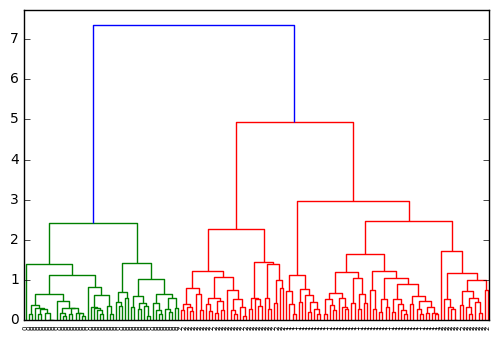

In [26]:
dendro = hierarchy.dendrogram(Z, labels = labels)

In [35]:
new_labels = iris["Species"].values
new_labels

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

<function matplotlib.pyplot.show>

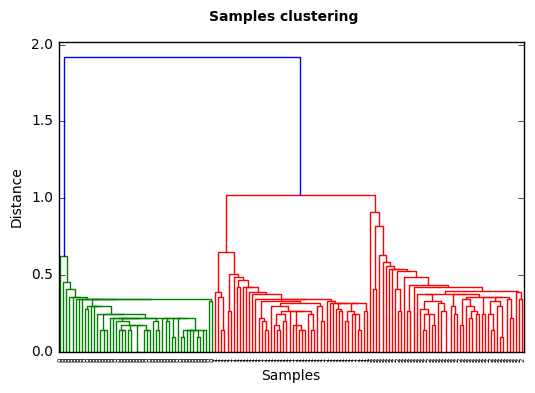

In [28]:
plt.clf()
dendrogram(data_link,labels = labels)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.suptitle('Samples clustering', fontweight='bold')  #the dendogram needs to be trunkeded
plt.show

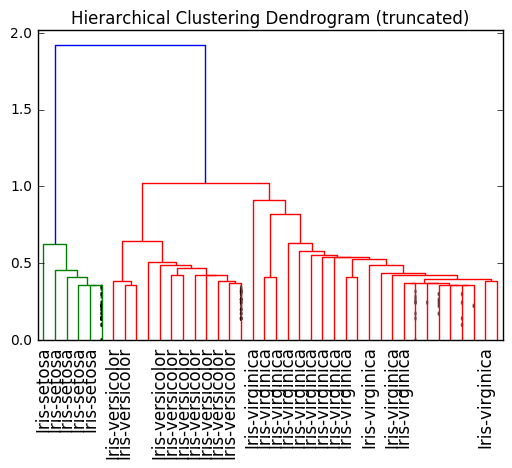

In [36]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
dendrogram(
    data_link,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=40,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    labels = new_labels# to get a distribution impression in truncated branches
)
plt.show()